In [18]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

In [19]:
import pandas as pd
import numpy as np

In [20]:
telco_df = pd.read_csv("/content/drive/MyDrive/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
bank_df = pd.read_csv("/content/drive/MyDrive/dataset/bank_churn/train.csv")

Exploratory Data Analysis

In [21]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [23]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [24]:
bank_df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Class Imbalance

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

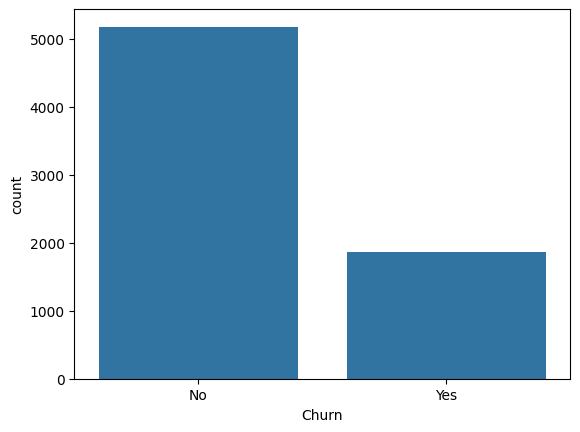

In [26]:
#How many customers churned-telecome
sns.countplot(x='Churn', data=telco_df)
plt.show()

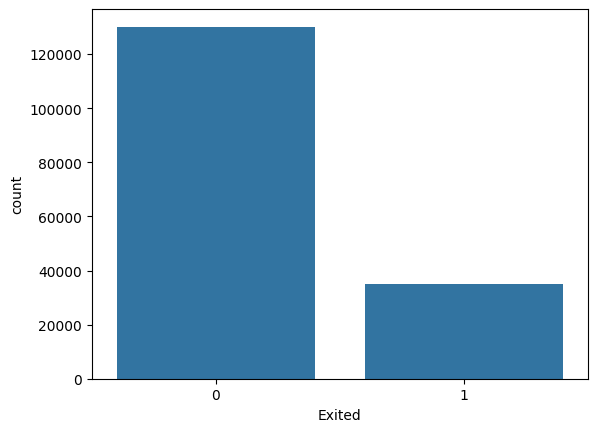

In [27]:
#How many customers churned-bank
sns.countplot(x='Exited', data=bank_df)
plt.show()

In [28]:
bank_churn_ratio = bank_df['Exited'].value_counts(normalize=True) * 100
bank_churn_ratio

,proportion
Exited,
0,78.840118
1,21.159882


In [29]:
telco_churn_ratio = telco_df['Churn'].value_counts(normalize=True) * 100
telco_churn_ratio

,proportion
Churn,
No,73.463013
Yes,26.536987


Feature Distributions

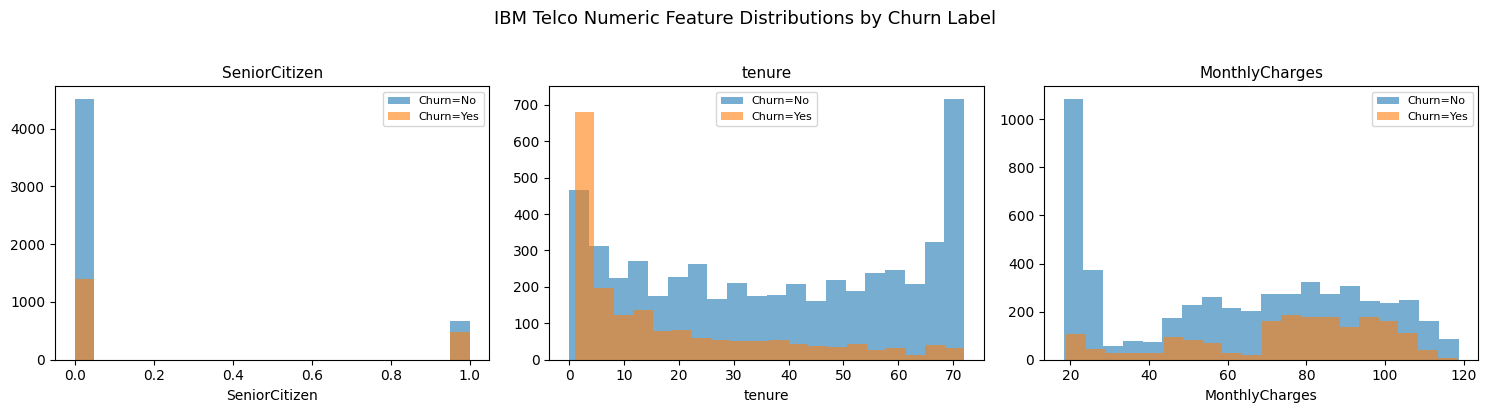

In [30]:
# IBM Telco: numeric feature distributions by churn label
telco_num_cols = telco_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
telco_num_cols = [c for c in telco_num_cols if c != 'Churn']

fig, axes = plt.subplots(1, len(telco_num_cols), figsize=(5 * len(telco_num_cols), 4))
if len(telco_num_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, telco_num_cols):
    for label, grp in telco_df.groupby('Churn'):
        ax.hist(grp[col].dropna(), bins=20, alpha=0.6, label=f'Churn={label}')
    ax.set_title(col, fontsize=11)
    ax.set_xlabel(col)
    ax.legend(fontsize=8)

plt.suptitle('IBM Telco Numeric Feature Distributions by Churn Label', fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

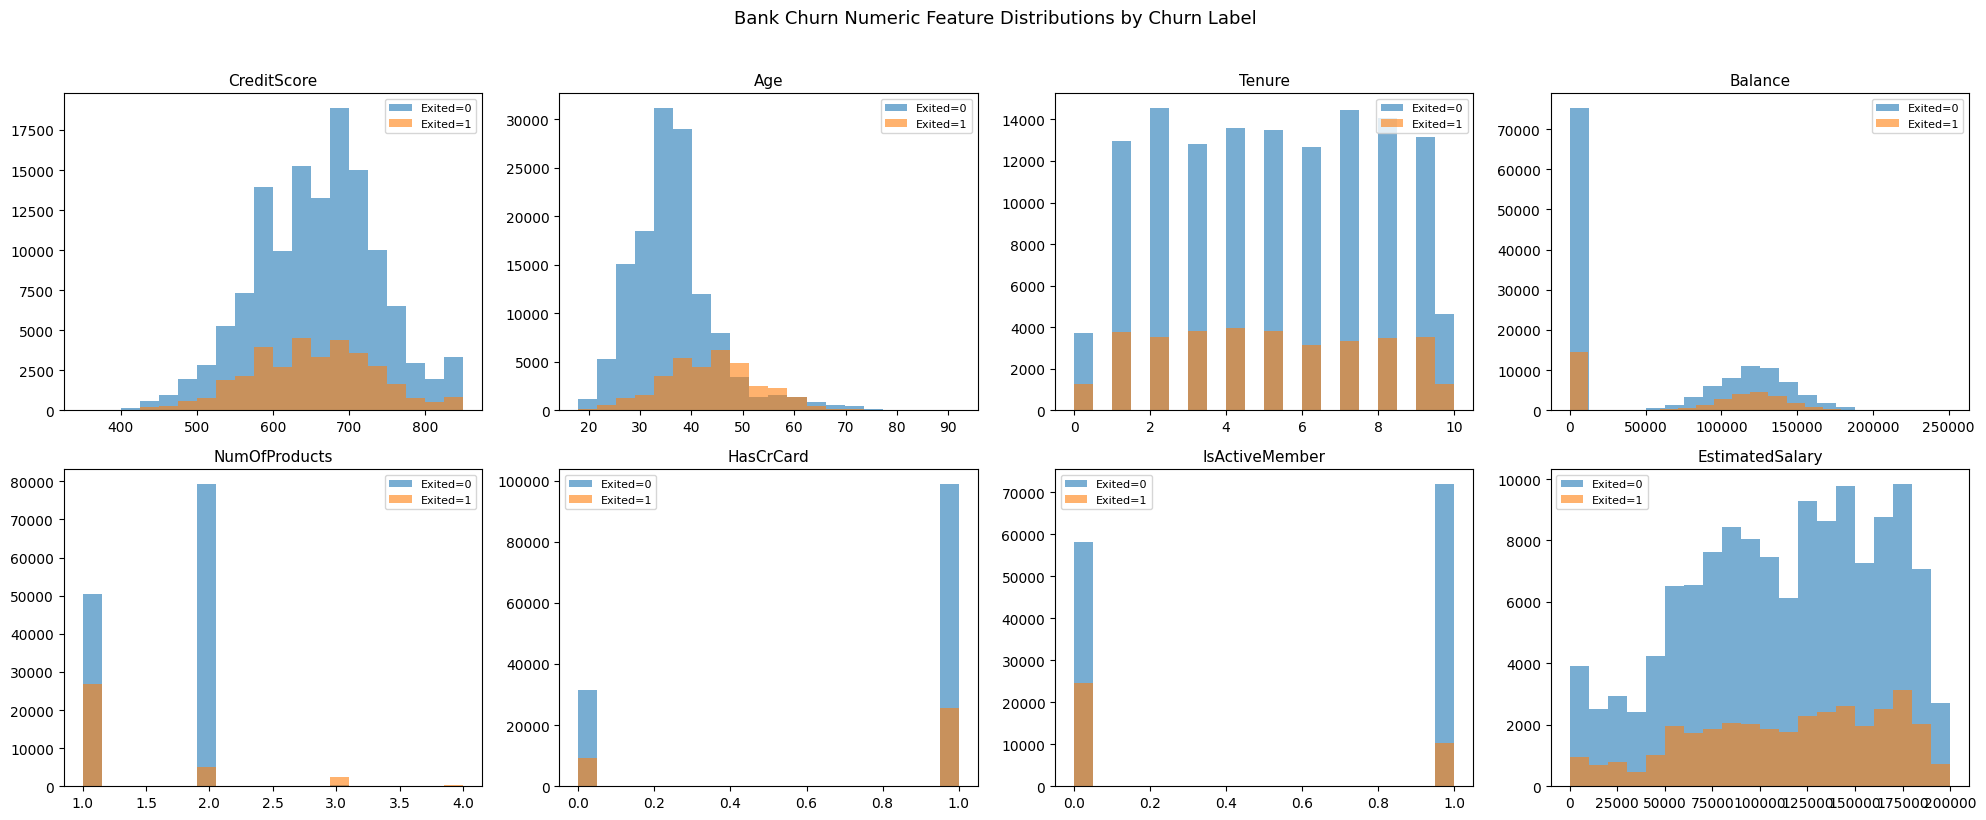

In [31]:
# Bank Churn: numeric feature distributions by exit label
bank_num_cols = bank_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
bank_num_cols = [c for c in bank_num_cols if c not in ['Exited', 'id', 'CustomerId']]

n = len(bank_num_cols)
ncols = 4
nrows = (n + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(bank_num_cols):
    for label, grp in bank_df.groupby('Exited'):
        axes[i].hist(grp[col].dropna(), bins=20, alpha=0.6, label=f'Exited={label}')
    axes[i].set_title(col, fontsize=11)
    axes[i].legend(fontsize=8)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Bank Churn Numeric Feature Distributions by Churn Label', fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

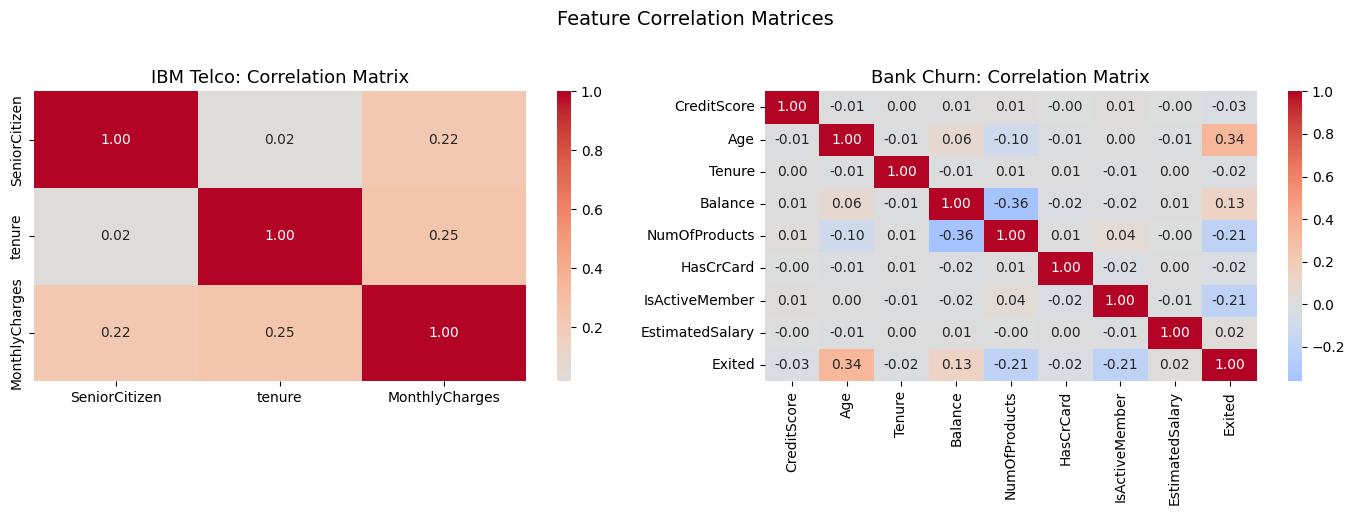

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

telco_numeric = telco_df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(telco_numeric.corr(), ax=axes[0], annot=True, fmt='.2f', cmap='coolwarm', center=0)
axes[0].set_title('IBM Telco: Correlation Matrix', fontsize=13)

bank_numeric = bank_df.select_dtypes(include=['int64', 'float64']).drop(
    columns=[c for c in ['id', 'CustomerId'] if c in bank_df.columns])
sns.heatmap(bank_numeric.corr(), ax=axes[1], annot=True, fmt='.2f', cmap='coolwarm', center=0)
axes[1].set_title('Bank Churn: Correlation Matrix', fontsize=13)

plt.suptitle('Feature Correlation Matrices', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()